In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
data.head(10)

lab_id    video_id mouse1_strain mouse1_color mouse1_sex  \
0  AdaptableSnail    44566106    CD-1 (ICR)        white       male   
1  AdaptableSnail   143861384    CD-1 (ICR)        white       male   
2  AdaptableSnail   209576908    CD-1 (ICR)        white       male   
3  AdaptableSnail   278643799    CD-1 (ICR)        white       male   
4  AdaptableSnail   351967631    CD-1 (ICR)        white       male   
5  AdaptableSnail   355542626    CD-1 (ICR)        white       male   
6  AdaptableSnail   678426900    CD-1 (ICR)        white       male   
7  AdaptableSnail   705948978    CD-1 (ICR)        white       male   
8  AdaptableSnail   878123481    CD-1 (ICR)        white       male   
9  AdaptableSnail  1212811043    CD-1 (ICR)        white       male   

   mouse1_id  mouse1_age mouse1_condition mouse2_strain mouse2_color  ...  \
0       10.0  8-12 weeks  wireless device    CD-1 (ICR)        white  ...   
1        3.0  8-12 weeks              NaN    CD-1 (ICR)        white  ...   
2        7.0  8-12 weeks              NaN    CD-1 (ICR)        white  ...   
3       11.0  8-12 weeks  wireless device    CD-1 (ICR)        white  ...   
4       14.0  8-12 weeks              NaN    CD-1 (ICR)        white  ...   
5       12.0  8-12 weeks  wireless device    CD-1 (ICR)        white  ...   
6       12.0  8-12 weeks              NaN    CD-1 (ICR)        white  ...   
7       10.0  8-12 weeks              NaN    CD-1 (ICR)        white  ...   
8        6.0  8-12 weeks              NaN    CD-1 (ICR)        white  ...   
9        5.0  8-12 weeks              NaN    CD-1 (ICR)        white  ...   

  pix_per_cm_approx  video_width_pix video_height_pix arena_width_cm  \
0              16.0             1228             1068           60.0   
1               9.7              968              608           60.0   
2              16.0             1266             1100           60.0   
3              16.0             1224             1100           60.0   
4              16.0             1204             1068           60.0   
5              16.0             1230             1058           60.0   
6              16.0             1230             1058           60.0   
7              16.0             1228             1068           60.0   
8               9.7              968              608           60.0   
9               9.7              968              608           60.0   

  arena_height_cm arena_shape arena_type  \
0            60.0      square   familiar   
1            60.0      square   familiar   
2            60.0      square   familiar   
3            60.0      square   familiar   
4            60.0      square   familiar   
5            60.0      square   familiar   
6            60.0      square   familiar   
7            60.0      square   familiar   
8            60.0      square   familiar   
9            60.0      square   familiar   

                                  body_parts_tracked  \
0  ["body_center", "ear_left", "ear_right", "head...   
1  ["body_center", "ear_left", "ear_right", "late...   
2  ["body_center", "ear_left", "ear_right", "late...   
3  ["body_center", "ear_left", "ear_right", "head...   
4  ["body_center", "ear_left", "ear_right", "late...   
5  ["body_center", "ear_left", "ear_right", "head...   
6  ["body_center", "ear_left", "ear_right", "late...   
7  ["body_center", "ear_left", "ear_right", "late...   
8  ["body_center", "ear_left", "ear_right", "late...   
9  ["body_center", "ear_left", "ear_right", "late...   

                                   behaviors_labeled tracking_method  
0  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
1  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
2  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
3  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
4  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
5  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      De

In [4]:
from pathlib import Path

root=Path("mabe_data")
print("Root exists:", root.exists())
print("Top-level items:", [p.name for p in root.iterdir()])

Root exists: True
Top-level items: ['train_tracking', '.DS_Store', 'test_tracking', 'train_annotation']


In [5]:
import os

train_tracking=os.path.join(root,'train_tracking')
test_tracking=os.path.join(root,'test_tracking')
train_annotation=os.path.join(root,'train_annotation')

In [6]:
print(f"Original number of training videos: {len(data)}")

Original number of training videos: 8789


In [7]:
data=data[~data['lab_id'].str.startswith('MABe22_')].reset_index(drop=True)
print(f"Number of training videos after filtering MABe22: {len(data)}")

print("\nTrain Metadata Sample")
display(data.head(3))

print("\nTest Metadata Sample")
display(test.head(3))

Number of training videos after filtering MABe22: 863

Train Metadata Sample


lab_id   video_id mouse1_strain mouse1_color mouse1_sex  mouse1_id  \
0  AdaptableSnail   44566106    CD-1 (ICR)        white       male       10.0   
1  AdaptableSnail  143861384    CD-1 (ICR)        white       male        3.0   
2  AdaptableSnail  209576908    CD-1 (ICR)        white       male        7.0   

   mouse1_age mouse1_condition mouse2_strain mouse2_color  ...  \
0  8-12 weeks  wireless device    CD-1 (ICR)        white  ...   
1  8-12 weeks              NaN    CD-1 (ICR)        white  ...   
2  8-12 weeks              NaN    CD-1 (ICR)        white  ...   

  pix_per_cm_approx  video_width_pix video_height_pix arena_width_cm  \
0              16.0             1228             1068           60.0   
1               9.7              968              608           60.0   
2              16.0             1266             1100           60.0   

  arena_height_cm arena_shape arena_type  \
0            60.0      square   familiar   
1            60.0      square   familiar   
2            60.0      square   familiar   

                                  body_parts_tracked  \
0  ["body_center", "ear_left", "ear_right", "head...   
1  ["body_center", "ear_left", "ear_right", "late...   
2  ["body_center", "ear_left", "ear_right", "late...   

                                   behaviors_labeled tracking_method  
0  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
1  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
2  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  

[3 rows x 38 columns]


Test Metadata Sample


lab_id   video_id mouse1_strain mouse1_color mouse1_sex  mouse1_id  \
0  AdaptableSnail  438887472    CD-1 (ICR)        white       male       13.0   

   mouse1_age mouse1_condition mouse2_strain mouse2_color  ...  \
0  8-12 weeks  wireless device    CD-1 (ICR)        white  ...   

  pix_per_cm_approx  video_width_pix video_height_pix arena_width_cm  \
0              16.0             1214             1090           60.0   

  arena_height_cm arena_shape arena_type  \
0            60.0      square   familiar   

                                  body_parts_tracked  \
0  ["body_center", "ear_left", "ear_right", "head...   

                                   behaviors_labeled tracking_method  
0  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  

[1 rows x 38 columns]

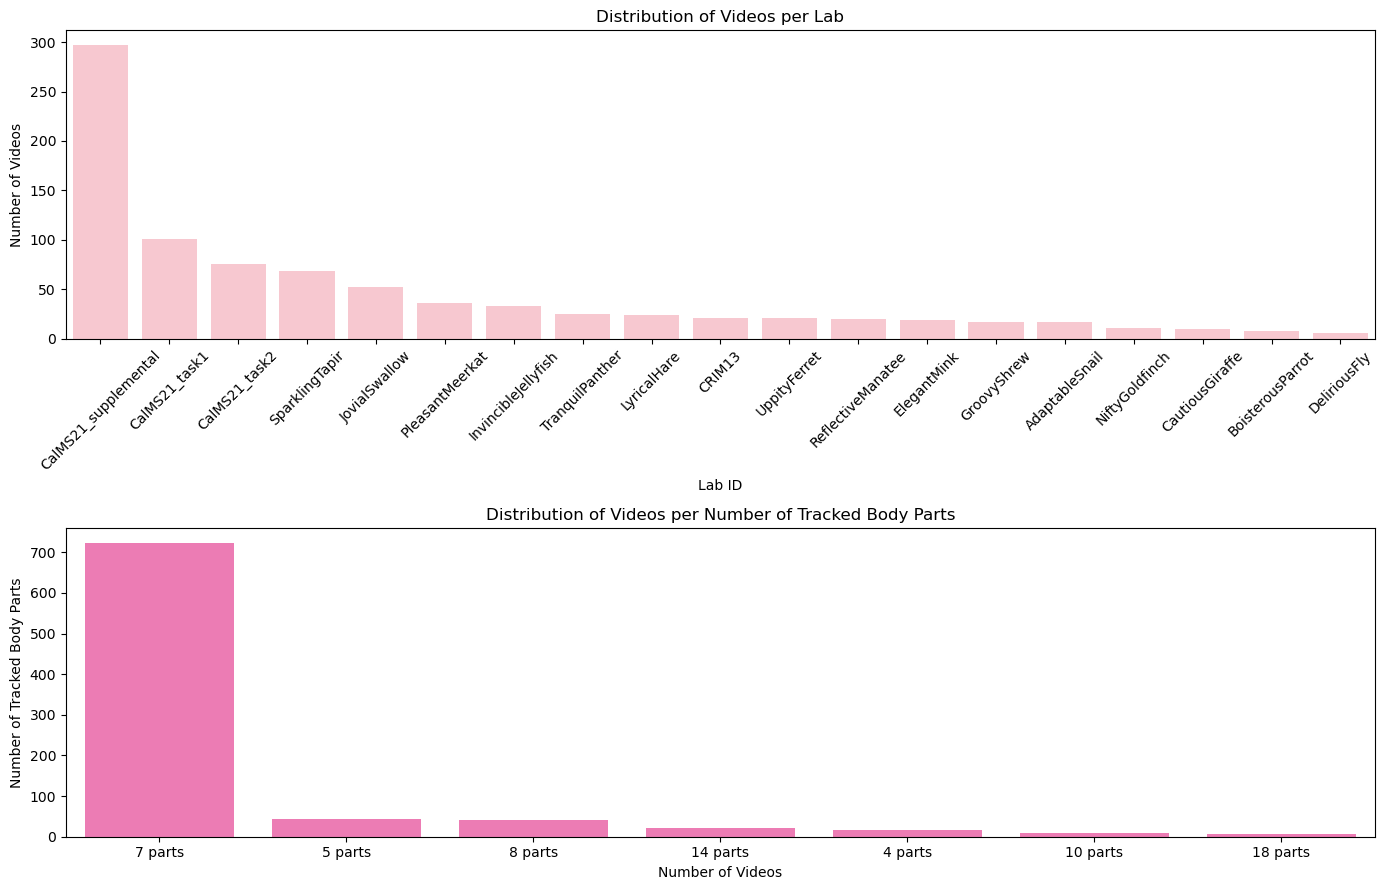

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import json

fig,axes=plt.subplots(2,1,figsize=(14,9))
lab_counts=data['lab_id'].value_counts()
sns.barplot(x=lab_counts.index,y=lab_counts.values,ax=axes[0],color='pink')
axes[0].set_title('Distribution of Videos per Lab')
axes[0].set_xlabel('Lab ID')
axes[0].set_ylabel('Number of Videos')
axes[0].tick_params(axis='x',rotation=45)

bodypart_counts=data['body_parts_tracked'].apply(lambda x: f"{len(json.loads(x))} parts").value_counts()
sns.barplot(x=bodypart_counts.index,y=bodypart_counts.values,ax=axes[1],color='hotpink')
axes[1].set_title('Distribution of Videos per Number of Tracked Body Parts')
axes[1].set_xlabel('Number of Videos')
axes[1].set_ylabel('Number of Tracked Body Parts')

plt.tight_layout()
plt.show()

In [9]:
target_behaviours={'attack','mount','chase'}
bodyparts_todrop=['headpiece_bottombackleft','headpiece_bottombackright','headpiece_bottomfrontleft','headpiece_bottomfrontright','headpiece_topbackleft','headpiece_topbackright','headpiece_topfrontleft','headpiece_topfrontright','spine_1','spine_2','tail_middle_1','tail_middle_2','tail_midpoint']

In [ ]:
def mouse_data_processor(metadata,mode='train'):
    assert mode in ['train','test'], "Mode must be 'train' or 'test'."

    base=train_tracking if mode=="train" else test_tracking
    missing,found=0
    paths=[]

    for _, row in metadata.iterrows():
        lab=str(row["lab_id"])
        vid=str(row["video_id"])
        path=base/lab/f"{vid}.parquet"

        if not path.exists():
            missing+=1
            continue

        paths.append(path)
        found+=1

    print(f"[{mode}] tracking files: found {found}, missing {missing} under {base}")
    return pd.DataFrame(paths)

    tracking=pd.read_parquet(path)

    if len(tracking['bodypart'].unique())>10:
        tracking=tracking[~tracking['bodypart'].isin(bodyparts_todrop)]

    pivoted=tracking.pivot(
    index='video_frame',
    columns=['mouse_id','bodypart'],
    values=['x','y'])

    pivoted=pivoted.reorder_levels([1,2,0],axis=1).sort_index(axis=1)

    if 'pix_per_cm_approx' in row and row['pix_per_cm_approx']>0:
        pivoted/=row['pix_per_cm_approx']

    for _, row in metadata.iterrows():
        raw=row.get("behaviours_labeled", None)

        parsed=None
        if isinstance(raw,list):
            parsed=raw
        elif isinstance(raw,str):
            s=raw.strip()
            if s:
                try:
                    parsed=json.loads(s)
                except json.JSONDecodeError:
                    try:
                        parsed=ast.literal_eval(s)
                    except Exception:
                        parsed=None
        if parsed is None:
            continue
        if len(parsed)==0:
            pass

    rows=[]
    for b in parsed:
        parts=None
        if isinstance(b,str):
            parts=[p.strip().strip("'\"") for p in b.split(",")]
        elif isinstance(b,(list,tuple)):
            parts=list(b)
        elif isinstance(b,dict):
            parts=[b.get("agent"),b.get("target"),b.get("action")]

        if parts and len(parts)>=3:
            rows.append(parts[:3])
        if not rows:
            continue

    behaviour=pd.DataFrame(rows,columns["agent","target","action"])
        
    available_mice=pivoted.columns.get_level_values('mouse_id').unique()

    for agent_id,target_id in itertools.permutations(available_mice,2):
        agent_str=f"mouse{agent_id}"
        target_str=f"mouse{target_id}"

        pair_actions=behaviour[
            (behaviour['agent']==agent_str)&
            (behaviour['target']==target_str)
        ]['action'].unique()

        relevant_actions=list(set(pair_actions)&target_behaviours)
        if not relevant_actions:
            continue

        agent_data=pivoted[agent_id]
        target_data=pivoted[target_id]
        pair_tracking_data=pd.concat([agent_data,target_data],axis=1,keys=['agent','target'])

        pair_metadata=pd.DataFrame({
            'video_id':rows['video_id'],
            'video_frame':pair_tracking_data.index,
            'agent_id':agent_str,
            'target_id':target_str})

        if mode=='train':
            annotation_path=os.path.join(train_annotation,row['lab_id'],f"{row['video_id']}.parquet")

            pair_labels=pd.DataFrame(0,index=pair_tracking_data.index,columns=relevant_actions)

            if os.path.exists(annotation_path):
                annotations=pd.read_parquet(annotation_path)

            pair_annotations=annotations[
                (annotations['agent_id']==agent_id)&
                (annotations['target_id']==target_id)&
                (annotations['action'].isin(relevant_actions))]

            for _, annotations_row in pair_annotations.iterrow():
                pair_labels.loc[annotations_row['start_frame']:annotations_row['stop_frame'],annotations_row['action']]=1

            yield 'pair', pair_tracking_data,pair_metadeta,pair_labels

        else:
            yield 'pair',pair_tracking_data,pair_metadata,relevant_actions

    

In [10]:
def index_tracking_paths(metadata,mode='train'):
    assert mode in ['train','test'], "Mode must be 'train' or 'test'."

    base=train_tracking if mode=="train" else test_tracking
    missing,found=0
    paths=[]

    for _, row in metadata.iterrows():
        lab=str(row["lab_id"])
        vid=str(row["video_id"])
        path=base/lab/f"{vid}.parquet"

        if not path.exists():
            missing+=1
            continue

        paths.append(path)
        found+=1

    print(f"[{mode}] tracking files: found {found}, missing {missing} under {base}")
    return pd.DataFrame(paths)

In [12]:
def load_and_pivot_tracking(path):
    tracking=pd.read_parquet(path)

    if len(tracking['bodypart'].unique())>10:
        tracking=tracking[~tracking['bodypart'].isin(bodyparts_todrop)]

    pivoted=tracking.pivot(
    index='video_frame',
    columns=['mouse_id','bodypart'],
    values=['x','y'])

    pivoted=pivoted.reorder_levels([1,2,0],axis=1).sort_index(axis=1)

    if 'pix_per_cm_approx' in row and row['pix_per_cm_approx']>0:
        pivoted/=row['pix_per_cm_approx']

    return pivoted

In [13]:
def parse_behaviours_labelled(raw)->pd.DataFrame|None:
    raw=row.get("behaviours_labeled", None)

    parsed=None
    if isinstance(raw,list):
        parsed=raw
    elif isinstance(raw,str):
        s=raw.strip()
        if s:
            try:
                parsed=json.loads(s)
            except json.JSONDecodeError:
                try:
                    parsed=ast.literal_eval(s)
                except Exception:
                    parsed=None
    if not parsed:
        return None

    rows=[]
    for b in parsed:
        parts=None
        if isinstance(b,str):
            parts=next(csv.reader([b]))
        elif isinstance(b,(list,tuple)):
            parts=list(b)
        elif isinstance(b,dict):
            parts=[b.get("agent"),b.get("target"),b.get("action")]
        else:
            continue
        if len(parts)>=3:
            rows.append(parts[:3])
    if not rows:
        return None
    behaviour=pd.DataFrame(rows,columns["agent","target","action"])

    return behaviour

In [15]:
def pair_samples(metadata:pd.DataFrame,mode="train",train_annotation=Path("mabe_data/train_annotation"),drop_body_parts=None,target_behaviours=None):
    base_tracks=index_tracking_path(metadata,mode=mode)
    target_behaviours=set(target_behaviours or [])

    for _,m in base_tracks.iterrows():
        row=metadata[(metadata["lab_id"]==m["lab_id"])&(metadata["video_id"]==m["video_id"])].iloc[0]
        pivoted=load_and_pivot_tracking(m["tracking_path"],drop_body_parts=drop_body_parts,pix_per_cm=row.get("pix_per_cm_approx"))

        try:
            available_mice=pivoted.columns.get_level_values('mouse_id').unique()
        except (KeyError,ValueError):
            available_mice=pivoted.columns.get_level_values(0).unique()

        behaviours=parse_behaviours_labeled(row.get("behaviours_labeled"))            
        
        for agent_id,target_id in itertools.permutations(available_mice,2):
            agent_str=f"mouse{agent_id}"
            target_str=f"mouse{target_id}"

        pair_actions=behaviour[
            (behaviour['agent']==agent_str)&
            (behaviour['target']==target_str)
        ]['action'].unique()

        relevant_actions=list(set(pair_actions)&target_behaviours)
        if not relevant_actions:
            continue

        agent_data=pivoted[agent_id]
        target_data=pivoted[target_id]
        pair_tracking_data=pd.concat([agent_data,target_data],axis=1,keys=['agent','target'])

        pair_metadata=pd.DataFrame({
            'video_id':m['video_id'],
            'video_frame':pair_tracking_data.index,
            'agent_id':agent_str,
            'target_id':target_str})

        if mode=='train':
            annotation_path=os.path.join(train_annotation,m['lab_id'],f"{m['video_id']}.parquet")
            pair_labels=pd.DataFrame(0,index=pair_tracking_data.index,columns=relevant_actions)

            if os.path.exists(annotation_path):
                annotations=pd.read_parquet(annotation_path)

            pair_annotations=annotations[
                (annotations['agent_id']==agent_id)&
                (annotations['target_id']==target_id)&
                (annotations['action'].isin(relevant_actions))]

            for _, annotations_row in pair_annotations.iterrow():
                pair_labels.loc[annotations_row['start_frame']:annotations_row['stop_frame'],annotations_row['action']]=1

            yield 'pair', pair_tracking_data,pair_metadeta,pair_labels

        else:
            yield 'pair',pair_tracking_data,pair_metadata,relevant_actions

    

In [16]:
!pwd

/Users/maudq/Desktop/code/mice
